## 이동평균 모델(MA)
시계열 데이터의 예측을 위해 사용되는 모델 중 하나. 현재 관측치를 이전 관측치들의 오차항(잔차)의 가중 평균으로 설명한다.
- 이동평균 : 이전 관측치들의 오차항의 가중 평균. 이동평균은 현재 시점에서의 예측값을 계산하는 데 사용된다.
- 오차항 : MA 모델에서는 시계열 데이터의 예측 오차를 이전 관측치들의 오차항으로 설명한다. 이전 관측치들의 오차항은 시계열 데이터의 불규칙한 패턴이나 예측할 수 없는 변동성을 나타내는 요소로 간주된다.
- 이동평균 차수 : MA 모델은 MA(q)로 표현되며, 'q'는 이동평균 차수를 나타낸다. 이동평균 차수는 몇 개의 이전 관측치들의 오차항을 사용하여 현재 시점의 예측값을 계산할지를 계산한다.
- 자기상관성 : MA 모델은 자기상관성이 없는 (무상관) 시계열 데이터를 가정한다. 즉 이전 관츠기들의 오차항들은 서로 상관되지 않는다고 가정<br>
ARIMA 모델의 구성 요소 중 하나이다.

In [2]:
# MA 모델링 실습
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 시계열 데이터 생성
np.random.seed(0)
n = 100 # 데이터 포인트 수
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0, 1, n) # 잔차 생성

# MA(2) 모델 생성
data = [0, 0]  # 초기값 설정
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])
    
# 데이터프레임 생성
df = pd.DataFrame({'Value' : data})

# 데이터 확인
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   2.552357
4   2.568168
..       ...
95  0.653792
96  0.221856
97  1.648756
98  0.839160
99  0.095580

[100 rows x 1 columns]


MA(2)에서 (2)는 모델의 차수

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -140.502
Date:                Mon, 05 Jun 2023   AIC                            289.003
Time:                        01:06:19   BIC                            299.424
Sample:                             0   HQIC                           293.221
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0436      0.134      0.324      0.746      -0.220       0.307
ma.L1          0.4539      0.093      4.905      0.000       0.273       0.635
ma.L2         -0.0975      0.112     -0.870      0.3

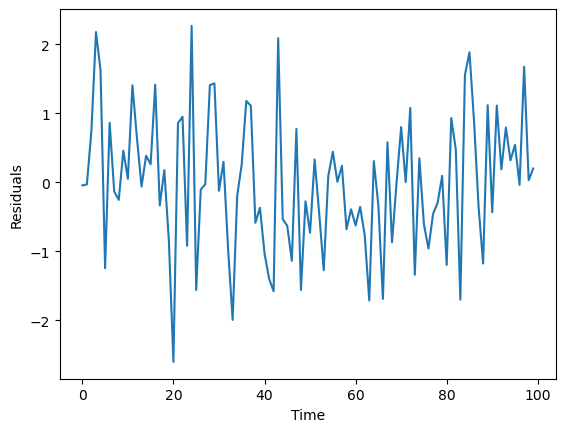

In [4]:
# MA(2) 모델 적합
model = ARIMA(df['Value'], order = (0, 0, 2))
results = model.fit()

# MA(2) 모델 정보 출력
print(results.summary())

# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

- ma.L1 . ma.L2 : MA(2) 모델의 계수
- sigma2 : 잔차의 분산
- Ljung-Box(L1)(Q) : 시계열 잔차의 자기상관성을 평가하는 지표
- Jarque-Bera(JB) : 잔차의 평균성을 평가하는 지표
- Heteroskedasticity(H): 잔차의 이분산성을 평가하는 지표
- Skew: 잔차의 비대칭성을 나타내는 지표
- Kurtosis: 잔차의 첨도를 나타내는 지표

#### 잔차 시계열 그래프
적합된 모델의 잔차(residuals)를 시간에 따라 나타낸 것. 잔차의 패턴이나 추세를 확인하는 데 사용됨. 잔차가 모델의 가정을 만족하는지, 어떠한 시간적 패턴을 가지는지 등을 파악할 수 있음